Hannah Reagan

Importing proper materials to do analysis

In [24]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

Importing the database 

In [25]:
conn = sqlite3.connect('../../data/im.db')
df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)


In [26]:
df = pd.read_sql("""SELECT * FROM directors;""", conn)

In [27]:
q = """
SELECT *
FROM movie_ratings
;
"""
#pd.read_sql(q, conn)

We are joining three tables ( persons, directors,movie ratings) Using movie_id to join directors and movie ratings and person_id to combine that new table to the persons table.

In [28]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
JOIN Persons
    ON persons.person_id = directors.person_id
;
"""
pd.read_sql(q, conn)
df_directors = pd.read_sql(q, conn)
df_directors

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181383,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


We are starting to clean the data:
1. Removing duplicate rows

In [29]:
df_duplicates = df_directors.drop_duplicates()
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
5,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...
181381,tt9805820,8.1,25,nm3828616,nm3828616,Alexandru Mavrodineanu,NaN,NaN,"director,writer,cinematographer"
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


2. Dropping columns['death_year','birth_year', 'person_id']

In [30]:
df_duplicates.drop(columns=['death_year','birth_year', 'person_id', 'primary_profession'],inplace=True)

C:\Users\HSTEUERNAGLE\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt10356526,8.3,31,Sukh Sanghera
2,tt10384606,8.9,559,Caolan Robertson
3,tt10384606,8.9,559,George Llewelyn-John
4,tt1042974,6.4,20,Marcel Grant
5,tt1043726,4.2,50352,Renny Harlin
...,...,...,...,...
181381,tt9805820,8.1,25,Alexandru Mavrodineanu
181382,tt9844256,7.5,24,Gorô Taniguchi
181384,tt9851050,4.7,14,Prachya Pinkaew
181385,tt9886934,7.0,5,Abel Ferrara


In [32]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86030 entries, 0 to 181386
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       86030 non-null  object 
 1   averagerating  86030 non-null  float64
 2   numvotes       86030 non-null  int64  
 3   primary_name   86030 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ MB


In [33]:
df.isna().sum()

movie_id     0
person_id    0
dtype: int64

3. Removing null values

In [34]:
df = df_duplicates.dropna()
df_duplicates.isna().sum()

movie_id         0
averagerating    0
numvotes         0
primary_name     0
dtype: int64

In [35]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt10356526,8.3,31,Sukh Sanghera
2,tt10384606,8.9,559,Caolan Robertson
3,tt10384606,8.9,559,George Llewelyn-John
4,tt1042974,6.4,20,Marcel Grant
5,tt1043726,4.2,50352,Renny Harlin
...,...,...,...,...
181381,tt9805820,8.1,25,Alexandru Mavrodineanu
181382,tt9844256,7.5,24,Gorô Taniguchi
181384,tt9851050,4.7,14,Prachya Pinkaew
181385,tt9886934,7.0,5,Abel Ferrara


Listed out top 10 directors with the most movies produced 

In [36]:
df_duplicates.value_counts("primary_name").head(10)

primary_name
Sergey A.              39
Nayato Fio Nuala       37
Larry Rosen            34
Dustin Ferguson        31
Jason Impey            30
Paul T.T. Easter       28
Michael Fredianelli    28
Tony Newton            27
David DeCoteau         27
William Winckler       25
dtype: int64

Listed out all the movies directed by Sergey A. with associated rating 

In [37]:
selected_rows = df_duplicates.query("primary_name == 'Sergey A.'")

selected_rows

,movie_id,averagerating,numvotes,primary_name
10539,tt8220556,8.0,28,Sergey A.
19415,tt6067750,7.0,55,Sergey A.
21237,tt4654864,7.1,29,Sergey A.
22713,tt4654818,7.5,33,Sergey A.
44205,tt5970646,7.3,37,Sergey A.
44565,tt6737634,6.7,37,Sergey A.
46850,tt7579702,6.7,31,Sergey A.
50606,tt7640228,5.8,48,Sergey A.
53202,tt4168808,7.1,138,Sergey A.
56963,tt6498526,7.2,42,Sergey A.


Calculate the mean rating for Sergey A.

In [38]:
averagerating_values =  selected_rows['averagerating']
mean_aveeragerating_sergey = sum(averagerating_values) / len(averagerating_values)
print(mean_aveeragerating_sergey )

7.441025641025644


Calculated the average rating for the top 10 directors based on the number of movies they directed

In [39]:
# Step 1
grouped_data = df_duplicates.groupby('primary_name').agg({'averagerating': 'mean', 'movie_id': 'size'})

 

# Step 2
grouped_data.rename(columns={'averagerating': 'mean_averagerating', 'movie_id': 'movie_count'}, inplace=True)

 

# Step 3
top_10_names = grouped_data.sort_values(by='movie_count', ascending=False).head(10)

 

# Step 4
mean_averagerating_top_10 = top_10_names['mean_averagerating'].mean()

 

# Print the top 10 names, their mean averagerating, and the mean of averagerating for the top 10 names
#print(top_10_names)
print("\nMean Averagerating for Top 10 Names:", mean_averagerating_top_10)

df2= top_10_names.sort_values('mean_averagerating',ascending=False)
print(df2.head(10))


Mean Averagerating for Top 10 Names: 5.417335630864094
                     mean_averagerating  movie_count
primary_name                                        
Sergey A.                      7.441026           39
Larry Rosen                    7.405882           34
William Winckler               6.980000           25
Michael Fredianelli            6.182143           28
Jason Impey                    5.543333           30
Tony Newton                    5.218519           27
Nayato Fio Nuala               4.713514           37
Dustin Ferguson                4.003226           31
David DeCoteau                 3.400000           27
Paul T.T. Easter               3.285714           28


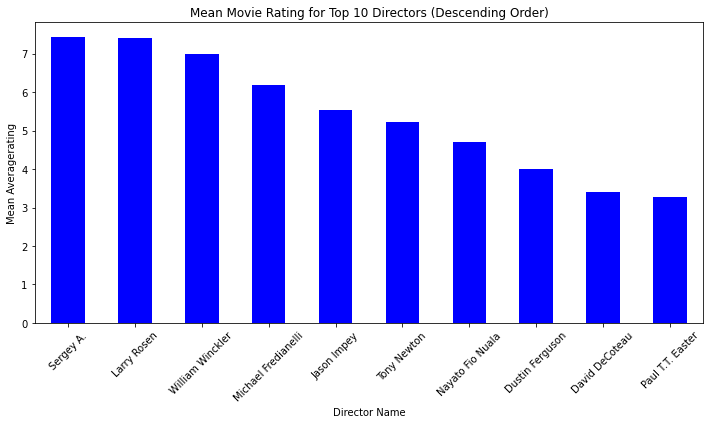

In [40]:
top_10_names_sorted = top_10_names.sort_values(by='mean_averagerating', ascending=False)

 

plt.figure(figsize=(10, 6))
top_10_names_sorted['mean_averagerating'].plot(kind='bar', color='blue')
plt.xlabel('Director Name')
plt.ylabel('Mean Averagerating')
plt.title('Mean Movie Rating for Top 10 Directors (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()

 

plt.show()

Checked to make sure there was no correlation between the rating and the number of votes associated with that rating 

In [41]:
df_duplicates['averagerating'].corr(df_duplicates['numvotes'])

0.04318315373312424

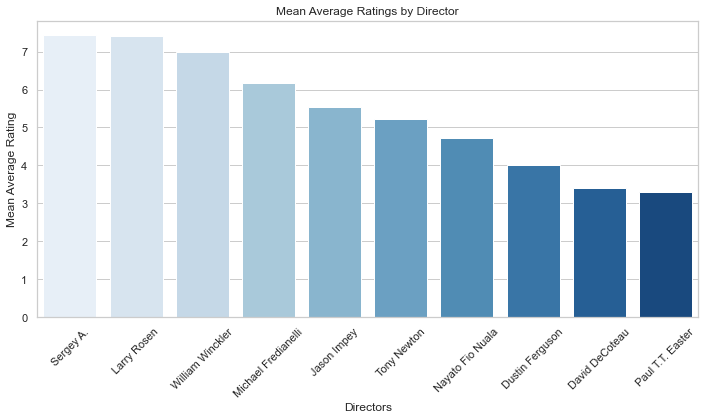

In [67]:

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

 

# Set up Seaborn

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

 

# Plot the bar graph

sns.barplot(x=df2.index, y='mean_averagerating', data=df2, palette="Blues")

plt.xticks(rotation=45)

plt.xlabel("Directors")

plt.ylabel("Mean Average Rating")

plt.title("Mean Average Ratings by Director")

plt.tight_layout()

 

# Show the plot

plt.show()
